# BIKE SHARING DEMAND PREDICTION

## EXPLORATIVE DATA ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
dataset = pd.read_csv('boombikes.csv')

In [3]:
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
dataset.shape

(730, 16)

In [8]:
check_dup=dataset.drop_duplicates()
check_dup.shape

(730, 16)

In [9]:
col=['instant','dteday','casual','registered']
dataset = dataset.drop(columns=col,axis=1)

In [10]:
dataset.rename(columns={'hum':'humidity','yr':'year','mnth':'month','cnt':'count'},inplace=True)

In [11]:
dataset

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [12]:
#change numeric season to value
season_cat = {1:'spring',2:'summer',3:'fall',4:'winter'}
dataset.season = [season_cat[item] for item in dataset.season]

In [13]:
year_cat = {0:'2018',1:'2019'}
dataset['year']=[year_cat[item] for item in dataset.year]

In [14]:
month_cat={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dataset.month = [month_cat[item] for item in dataset.month]

In [15]:
weekday_cat = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'}
dataset.weekday = [weekday_cat[item] for item in dataset.weekday]

In [16]:
dataset['weathersit'].astype('category').value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [17]:
weathersit_cat={1:'A',2:'B',3:'C'}
dataset['weathersit']=[weathersit_cat[item] for item in dataset.weathersit]

## DATA VISUALIZATION

<AxesSubplot: xlabel='season', ylabel='count'>

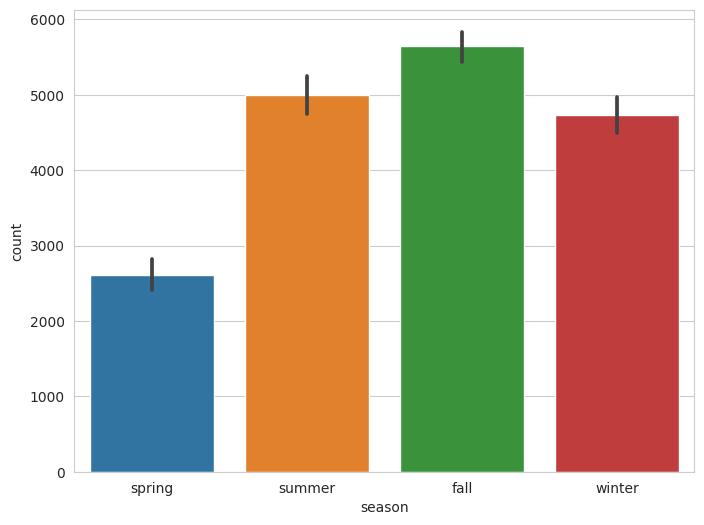

In [18]:
# seasons plot
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
sns.barplot(x=dataset['season'],y=dataset['count'],data=dataset)

<AxesSubplot: xlabel='year', ylabel='count'>

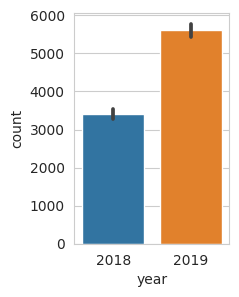

In [19]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(2,3))

sns.barplot(x=dataset['year'],y=dataset['count'],data=dataset)

<AxesSubplot: xlabel='month', ylabel='count'>

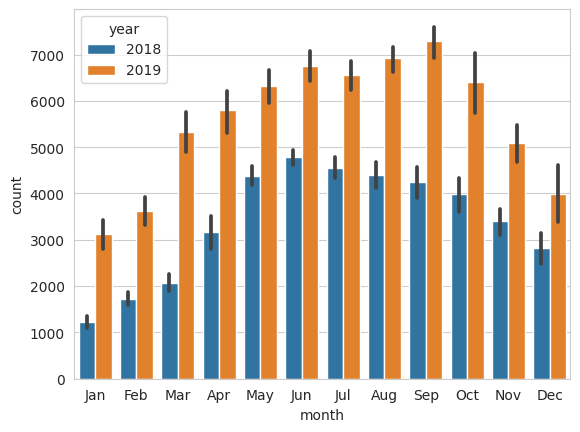

In [20]:
sns.barplot(x='month',y='count',hue='year',data=dataset)

<AxesSubplot: xlabel='weathersit', ylabel='count'>

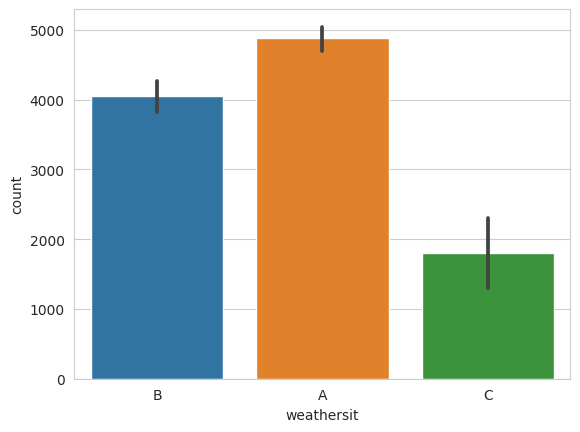

In [21]:
sns.barplot(x='weathersit',y='count',data=dataset)

<AxesSubplot: xlabel='weekday', ylabel='count'>

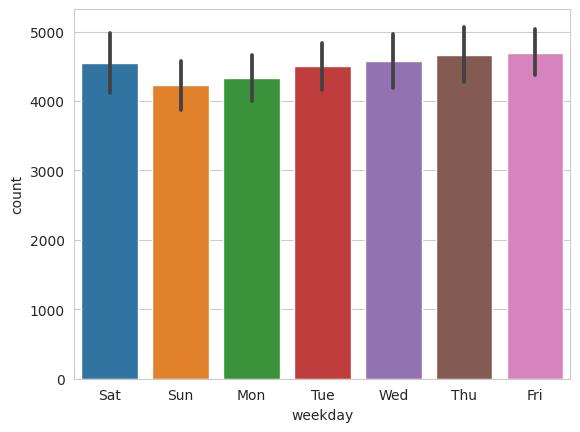

In [22]:
sns.barplot(x='weekday',y='count',data=dataset)

<AxesSubplot: xlabel='workingday', ylabel='count'>

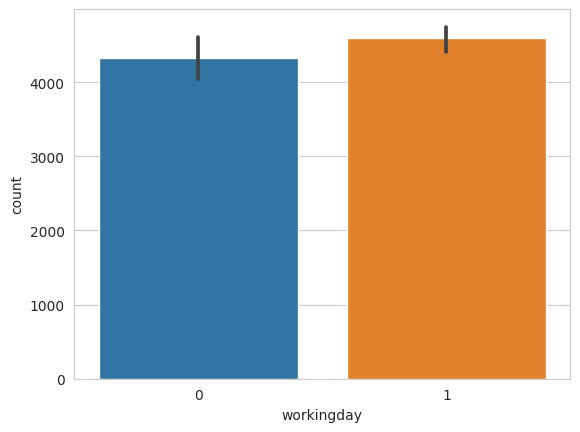

In [23]:
sns.barplot(x='workingday',y='count',data=dataset)

/home/trinadh/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


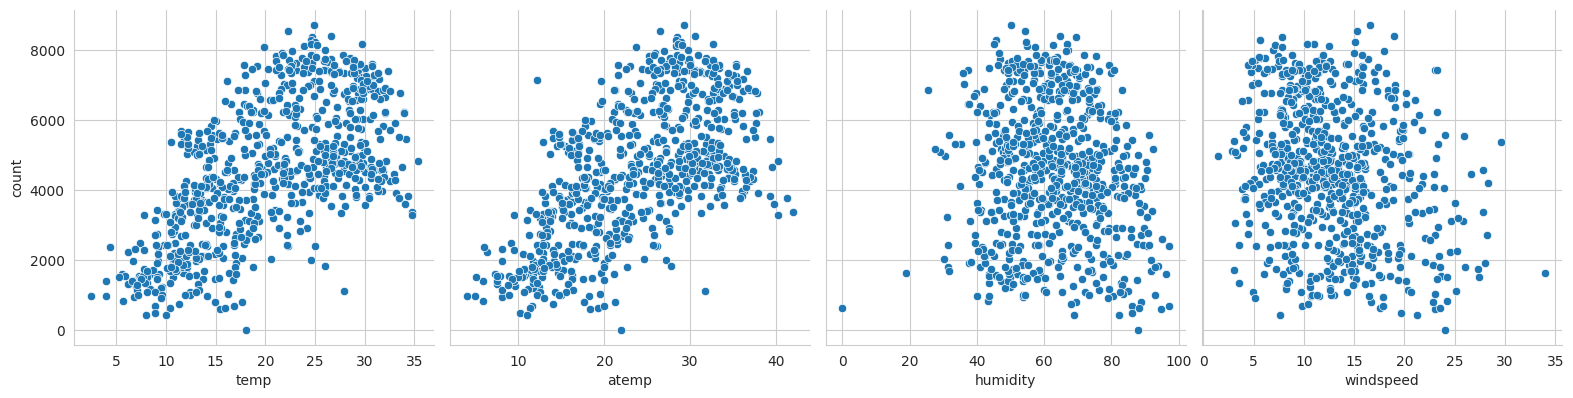

In [24]:
sns.pairplot(dataset,x_vars=['temp','atemp','humidity','windspeed'],y_vars='count',size=4)

/tmp/ipykernel_20779/1382016721.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap='YlGnBu')


<AxesSubplot: >

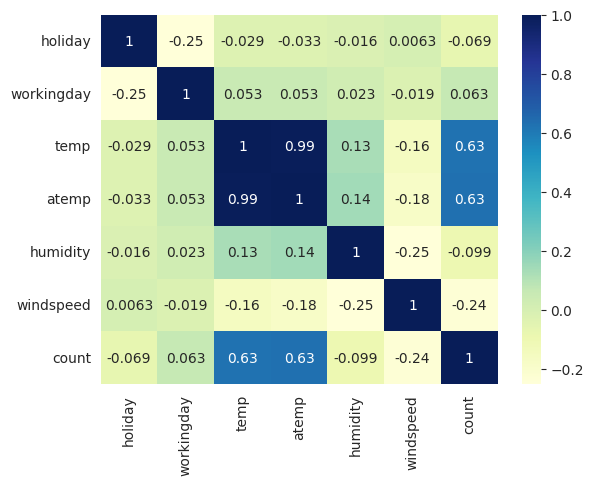

In [25]:
sns.heatmap(dataset.corr(),annot=True,cmap='YlGnBu')

## DATA PREPERATION

In [26]:
dataset_categorical = dataset.select_dtypes(include=['object'])

In [27]:
dataset_categorical.head()

,season,year,month,weekday,weathersit
0,spring,2018,Jan,Sat,B
1,spring,2018,Jan,Sun,B
2,spring,2018,Jan,Mon,A
3,spring,2018,Jan,Tue,A
4,spring,2018,Jan,Wed,A


In [28]:
dataset_dummies  = pd.get_dummies(dataset_categorical,drop_first=True)

In [29]:
dataset_dummies

,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
726,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
727,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
dataset=dataset.drop(list(dataset_categorical.columns),axis=1)

In [31]:
dataset

,holiday,workingday,temp,atemp,humidity,windspeed,count
0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...
725,0,1,10.420847,11.33210,65.2917,23.458911,2114
726,0,1,10.386653,12.75230,59.0000,10.416557,3095
727,0,0,10.386653,12.12000,75.2917,8.333661,1341
728,0,0,10.489153,11.58500,48.3333,23.500518,1796


In [32]:
dataset = pd.concat([dataset,dataset_dummies],axis=1)

In [33]:
dataset

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,0,1,0,0,1,0
726,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,...,0,0,0,0,0,0,0,0,1,0
727,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## MODEL BUILDING AND EVALUATION

In [34]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [35]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
ds_train,ds_test=train_test_split(dataset,train_size=0.7,test_size=0.3,random_state=100)

In [36]:
ds_train

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,0,1,19.201653,23.04230,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,16.980847,20.67460,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,1,29.554153,32.98605,58.7917,13.916771,6664,0,1,0,...,0,0,1,0,0,0,0,0,1,0
578,0,1,30.852500,35.35440,65.9583,8.666718,7261,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,1,9.091299,12.28585,42.3043,6.305571,1917,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,10.591653,12.46855,56.0833,16.292189,2739,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [38]:
var=["temp","humidity","windspeed","atemp","count"]
ds_train[var]=scaler.fit_transform(ds_train[var])

In [39]:
ds_train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


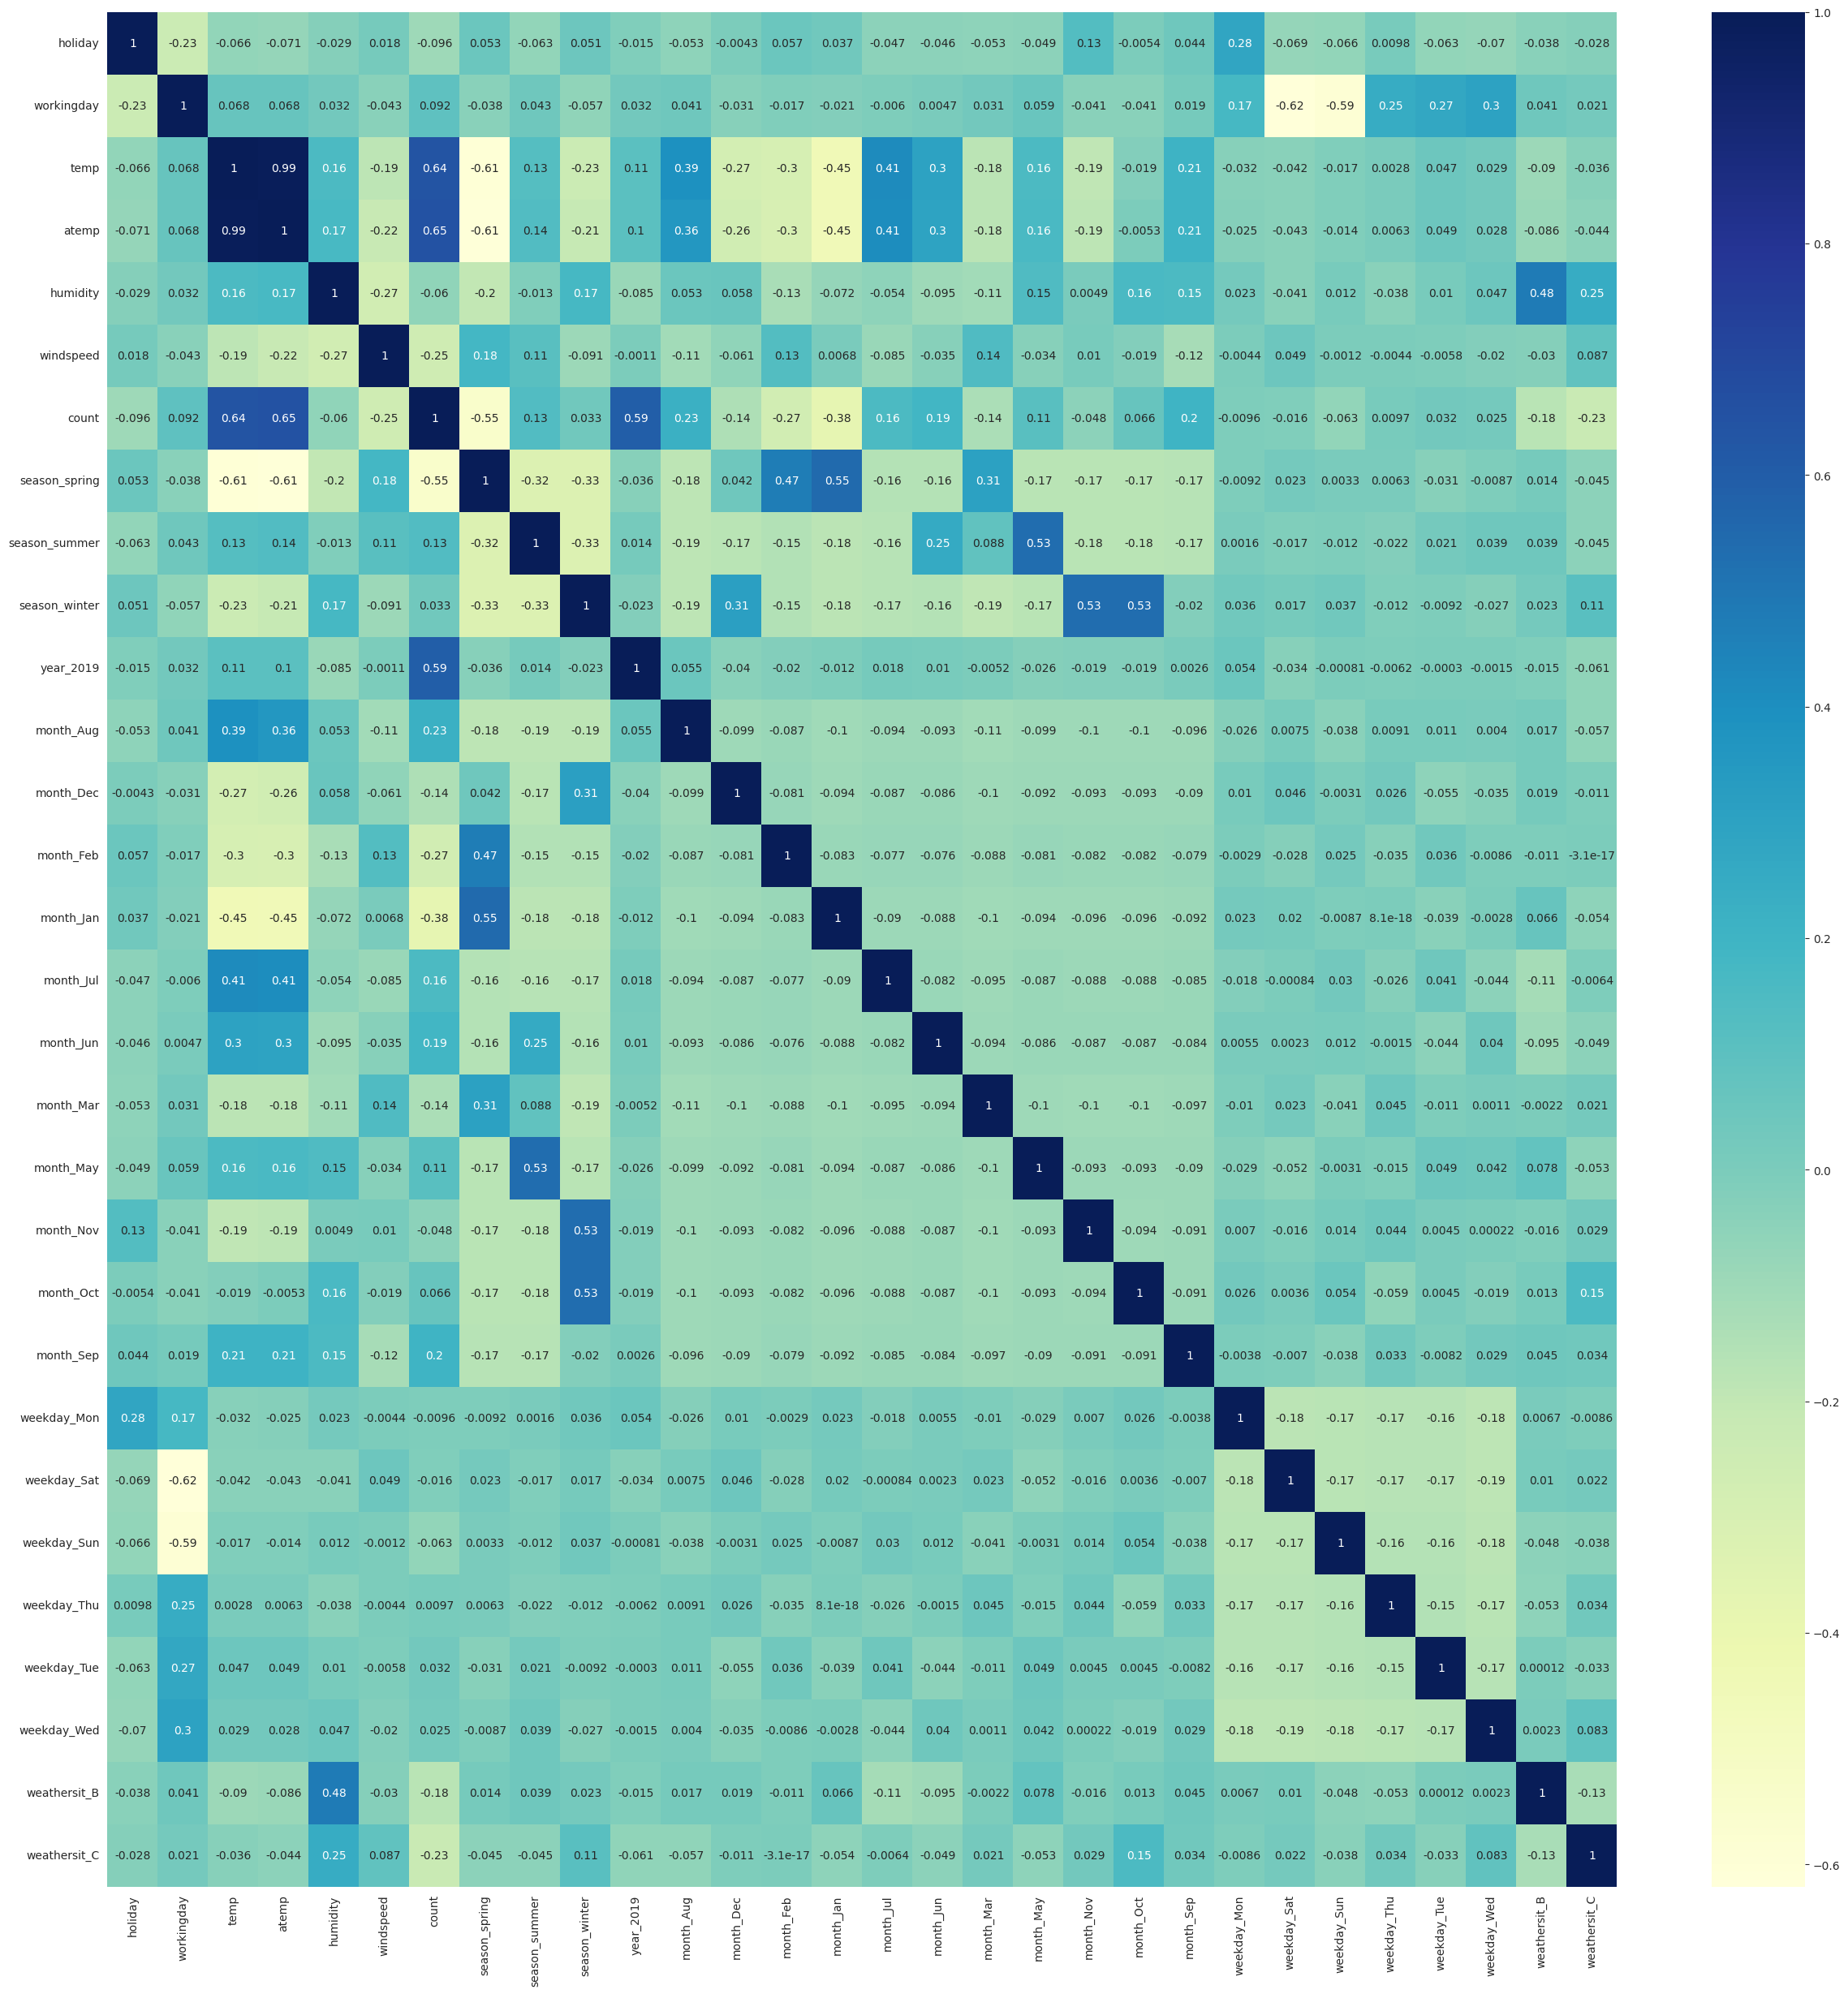

In [40]:
plt.figure(figsize=(30,30))
sns.heatmap(ds_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [41]:
x_train=ds_train.drop(["count"],axis=1)
y_train=ds_train['count']

In [42]:
x_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,year_2019,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
728,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0


In [43]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [44]:
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train)
lr = sm.OLS(y_train,x_train_lm).fit()

In [45]:
lr.params

const            0.245237
holiday          0.010689
workingday       0.096962
temp             0.401322
atemp            0.050628
humidity        -0.151812
windspeed       -0.184388
season_spring   -0.048580
season_summer    0.038216
season_winter    0.105387
year_2019        0.232208
month_Aug        0.016076
month_Dec       -0.045572
month_Feb       -0.032176
month_Jan       -0.062565
month_Jul       -0.039277
month_Jun       -0.001704
month_Mar        0.001288
month_May        0.024691
month_Nov       -0.041783
month_Oct        0.007695
month_Sep        0.081806
weekday_Mon     -0.021502
weekday_Sat      0.096059
weekday_Sun      0.041527
weekday_Thu     -0.009750
weekday_Tue     -0.019308
weekday_Wed     -0.005733
weathersit_B    -0.061030
weathersit_C    -0.256697
dtype: float64

In [46]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sat, 15 Apr 2023   Prob (F-statistic):          8.42e-181
Time:                        21:25:47   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2452      0.035      6.953      0.000       0.176       0.315
holiday           0.0107      0.024      0.443      0.658      -0.037       0.058
workingday        0.0970      0.012      7.903      0.000       0.073       0.121
temp              0.4013      0.142      2.821      0.005       0.122       0.681
atemp             0.0506      0.138      0.366      0.714      -0.221       0.322
humidity         -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed        -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_spring    -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_summer     0.0382      0.026      1.455      0.146      -0.013       0.090
season_winter     0.1054      0.028      3.770      0.000       0.050       0.160
year_2019         0.2322      0.008     28.792      0.000       0.216       0.248
month_Aug         0.0161      0.034      0.473      0.637      -0.051       0.083
month_Dec        -0.0456      0.034     -1.356      0.176      -0.112       0.020
month_Feb        -0.0322      0.033     -0.978      0.329      -0.097       0.032
month_Jan        -0.0626      0.034     -1.864      0.063      -0.129       0.003
month_Jul        -0.0393      0.035     -1.116      0.265      -0.108       0.030
month_Jun        -0.0017      0.025     -0.067      0.946      -0.051       0.048
month_Mar         0.0013      0.025      0.052      0.958      -0.047       0.050
month_May         0.0247      0.021      1.169      0.243      -0.017       0.066
month_Nov        -0.0418      0.036     -1.149      0.251      -0.113       0.030
month_Oct         0.0077      0.036      0.215      0.830      -0.063       0.078
month_Sep         0.0818      0.032      2.549      0.011       0.019       0.145
weekday_Mon      -0.0215      0.015     -1.395      0.164      -0.052       0.009
weekday_Sat       0.0961      0.014      6.984      0.000       0.069       0.123
weekday_Sun       0.0415      0.014      2.974      0.003       0.014       0.069
weekday_Thu      -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_Tue      -0.0193      0.016     -1.242      0.215      -0.050       0.011
weekday_Wed      -0.0057      0.015     -0.384      0.701      -0.035       0.024
weathersit_B     -0.0610      0.010     -5.845      0.000      -0.082      -0.041
weathersit_C     -0.2567      0.026     -9.712      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.            

In [47]:
from sklearn.feature_selection import RFE

In [48]:
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15, step=1)
rfe1.fit(x_train,y_train)
print(rfe1.support_)
print(rfe1.ranking_)


[ True  True  True False  True  True  True  True  True  True False False
 False  True  True False False False False False  True False  True False
 False False False  True  True]
[ 1  1  1  7  1  1  1  1  1  1  8  3  4  1  1 14 15  5  2 11  1  9  1  6
 12 10 13  1  1]


In [49]:
col1 = x_train.columns[rfe1.support_]

In [50]:
col1

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'year_2019',
       'month_Jan', 'month_Jul', 'month_Sep', 'weekday_Sat', 'weathersit_B',
       'weathersit_C'],
      dtype='object')

In [51]:
x_train_rfe1 = x_train[col1]
x_train_rfe1 = sm.add_constant(x_train)
lr = sm.OLS(y_train,x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sat, 15 Apr 2023   Prob (F-statistic):          8.42e-181
Time:                        21:25:47   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2452      0.035      6.953      0.000       0.176       0.315
holiday           0.0107      0.024      0.443      0.658      -0.037       0.058
workingday        0.0970      0.012      7.903      0.000       0.073       0.121
temp              0.4013      0.142      2.821      0.005       0.122       0.681
atemp             0.0506      0.138      0.366      0.714      -0.221       0.322
humidity         -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed        -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_spring    -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_summer     0.0382      0.026      1.455      0.146      -0.013       0.090
season_winter     0.1054      0.028      3.770      0.000       0.050       0.160
year_2019         0.2322      0.008     28.792      0.000       0.216       0.248
month_Aug         0.0161      0.034      0.473      0.637      -0.051       0.083
month_Dec        -0.0456      0.034     -1.356      0.176      -0.112       0.020
month_Feb        -0.0322      0.033     -0.978      0.329      -0.097       0.032
month_Jan        -0.0626      0.034     -1.864      0.063      -0.129       0.003
month_Jul        -0.0393      0.035     -1.116      0.265      -0.108       0.030
month_Jun        -0.0017      0.025     -0.067      0.946      -0.051       0.048
month_Mar         0.0013      0.025      0.052      0.958      -0.047       0.050
month_May         0.0247      0.021      1.169      0.243      -0.017       0.066
month_Nov        -0.0418      0.036     -1.149      0.251      -0.113       0.030
month_Oct         0.0077      0.036      0.215      0.830      -0.063       0.078
month_Sep         0.0818      0.032      2.549      0.011       0.019       0.145
weekday_Mon      -0.0215      0.015     -1.395      0.164      -0.052       0.009
weekday_Sat       0.0961      0.014      6.984      0.000       0.069       0.123
weekday_Sun       0.0415      0.014      2.974      0.003       0.014       0.069
weekday_Thu      -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_Tue      -0.0193      0.016     -1.242      0.215      -0.050       0.011
weekday_Wed      -0.0057      0.015     -0.384      0.701      -0.035       0.024
weathersit_B     -0.0610      0.010     -5.845      0.000      -0.082      -0.041
weathersit_C     -0.2567      0.026     -9.712      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.            

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
x_train_rfe1

,const,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1.0,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1.0,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1.0,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1.0,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1.0,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0,1,0.824514,0.762183,0.605840,0.355596,0,1,0,...,0,0,1,0,0,0,0,0,1,0
578,1.0,0,1,0.863973,0.824359,0.679690,0.187140,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,1.0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [54]:
a = x_train_rfe1.drop('const',axis=1)

In [55]:
vif = pd.DataFrame()
vif['features']=a.columns
vif['VIF'] = [variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,workingday,85.60
2,temp,67.12
3,atemp,56.09
22,weekday_Sat,19.72
23,weekday_Sun,18.35
6,season_spring,10.80
8,season_winter,9.52
7,season_summer,8.31
18,month_Nov,6.80
19,month_Oct,6.59


In [56]:
lm2 = LinearRegression()
rfe2 = RFE(lm2, n_features_to_select=7, step=1)
rfe2.fit(x_train,y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[False False  True False  True  True  True False False  True False False
 False False  True False False False False False False False False False
 False False False False  True]
[ 2  8  1 15  1  1  1  6  3  1 16 11 12  9  1 22 23 13 10 19  4 17  7 14
 20 18 21  5  1]


In [57]:
col2 = x_train.columns[rfe1.support_]
x_train_rfe2 = x_train[col2]
x_train_rfe2 = sm.add_constant(x_train_rfe2)
lm2 = sm.OLS(y_train,x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 15 Apr 2023   Prob (F-statistic):          2.31e-191
Time:                        21:25:48   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949      0.000       0.180       0.322
holiday          -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday        0.0435      0.012      3.781      0.000       0.021       0.066
temp              0.5098      0.034     14.851      0.000       0.442       0.577
humidity         -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed        -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring    -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer     0.0497      0.015      3.346      0.001       0.020       0.079
season_winter     0.0944      0.017      5.479      0.000       0.061       0.128
year_2019         0.2305      0.008     28.807      0.000       0.215       0.246
month_Jan        -0.0343      0.017     -1.980      0.048      -0.068      -0.000
month_Jul        -0.0532      0.018     -2.947      0.003      -0.089      -0.018
month_Sep         0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Sat       0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_B     -0.0578      0.010     -5.574      0.000      -0.078      -0.037
weathersit_C     -0.2488      0.026     -9.560      0.000      -0.300      -0.198
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
b = x_train_rfe2.drop('const',axis=1)

vif1 = pd.DataFrame()
vif1['features']=b.columns
vif1['VIF'] = [variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif['VIF'],2)
vif1 = vif1.sort_values(by='VIF', ascending=False)
vif1

,features,VIF
1,workingday,85.60
2,temp,67.12
3,humidity,56.09
6,season_summer,10.80
8,year_2019,9.52
7,season_winter,8.31
10,month_Jul,6.54
13,weathersit_B,5.90
14,weathersit_C,5.70
11,month_Sep,5.68


In [59]:
y_train_cnt = lm2.predict(x_train_rfe2)

In [60]:
y_train_cnt

653    0.734498
576    0.725987
426    0.505653
728    0.355332
482    0.615722
         ...   
526    0.777409
578    0.825590
53     0.258901
350    0.298201
79     0.306182
Length: 510, dtype: float64

/tmp/ipykernel_20779/335366442.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train,y_train_cnt),bins=20)


<AxesSubplot: ylabel='Density'>

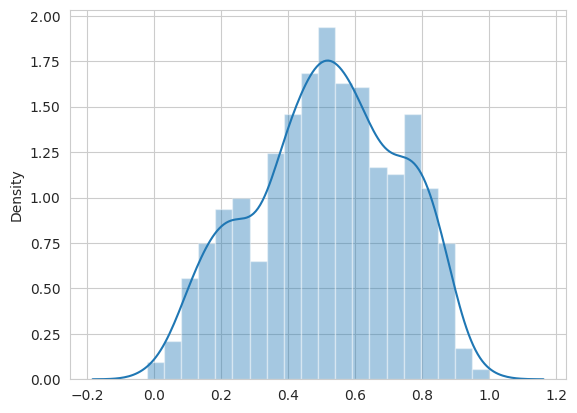

In [61]:
fig = plt.figure()
sns.distplot((y_train,y_train_cnt),bins=20)

In [62]:
ds_test[var] = scaler.transform(ds_test[var])

In [63]:
y_test = ds_test.pop('count')
x_test = ds_test

In [64]:
c = x_train_rfe2.drop('const',axis=1)

In [65]:
col2 = c.columns

In [66]:
x_test_rfe2 = x_test[col2]

In [67]:
x_test_rfe2 = sm.add_constant(x_test_rfe2)

In [68]:
y_pred = lm2.predict(x_test_rfe2)

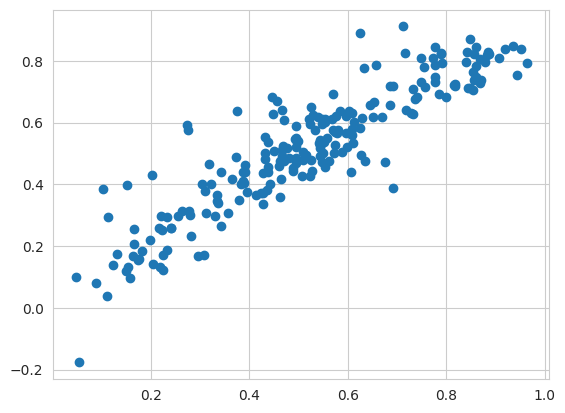

In [69]:
plt.figure()
plt.scatter(y_test,y_pred)

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.814323726851943